In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<a id='model'></a>
# Build Model

> <ul>
    <li>Idea: using different model to predict if we can get positive response from the customer.</li>
    <li>Target label: success -- times of positive responses for one contact</li>
    <li>Feature: calls_time(the differece between starting time and ending time), events_time, activity_action(times of activities)</li>
    <li>Goal: after running the model, we can predict if the customer is positive. If it is positive, then the customer is in our potential customer list.</li>
    </ul>

In [140]:
model_data = pd.read_csv("../data/transformed_data.csv")
del model_data["Unnamed: 0"]
day_of_week_to_predict = "Monday"
model_data = model_data[model_data["most_recent_call_dayofweek"]==day_of_week_to_predict]
assert len(model_data) == len(model_data['contact_id'].unique())

In [141]:
X = model_data.drop(["successful_call", 'total_no_success', 'total_success'], axis=1)
y = model_data.successful_call.values
X_train_with_contacts, X_test_with_contacts, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)
X_train = X_train_with_contacts.drop(["contact_id", "company_id", "most_recent_event", "least_recent_event", 
                                   "least_recent_event_month", "least_recent_event_dayofweek", 
                                   "most_recent_call_dayofweek", "least_recent_call_dayofweek", 
                                   "most_recent_call", "least_recent_call"], axis=1)
X_test = X_test_with_contacts.drop(["contact_id", "company_id", "most_recent_event", "least_recent_event", 
                                   "least_recent_event_month", "least_recent_event_dayofweek", 
                                   "most_recent_call_dayofweek", "least_recent_call_dayofweek", 
                                   "most_recent_call", "least_recent_call"], axis=1)

## Model Building Process
We apply 7 Classification Predictor Algorithms to our predictive model as the list below. Then use 10-fold to get cross validation score and do the model validation.

1. KNN
2. Logistic Regression
3. SVM
4. Decision Tree
5. Random Forest
6. AdaBoost
7. XGBoost
8. LightGBM Classifier

In [126]:
#The code for the below matrix is taken from sklearn documentation
#Defining the confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Success and Failure for 0 and 1    
class_names = ['Success','Failure']

kNN Accuracy is 0.61
{'fit_time': array([0.11514807, 0.09818912, 0.10509276, 0.08728194, 0.10792398]), 'score_time': array([3.01038003, 2.97777295, 3.06926942, 3.33163023, 3.09711385]), 'test_accuracy': array([0.61131542, 0.61046676, 0.6032824 , 0.60186757, 0.59818902]), 'test_precision_weighted': array([0.58316263, 0.58516367, 0.57596632, 0.57527331, 0.56244178]), 'test_recall_weighted': array([0.61131542, 0.61046676, 0.6032824 , 0.60186757, 0.59818902]), 'test_f1_weighted': array([0.578659  , 0.56979829, 0.56286313, 0.56539367, 0.55326112]), 'test_roc_auc': array([0.59632402, 0.59618939, 0.585399  , 0.57506218, 0.57599778])}
kNN Cross Validation Score = 0.61
              precision    recall  f1-score   support

           0       0.64      0.84      0.72      2695
           1       0.50      0.26      0.34      1724

    accuracy                           0.61      4419
   macro avg       0.57      0.55      0.53      4419
weighted avg       0.59      0.61      0.57      4419



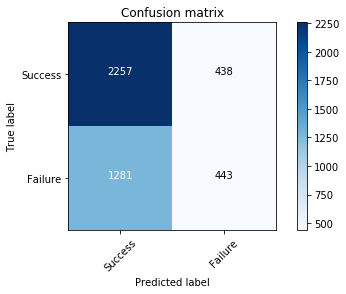

Logistic Regression Accuracy is 0.64
{'fit_time': array([3.06606698, 2.69276595, 2.76896787, 2.9803431 , 2.19983792]), 'score_time': array([0.01360106, 0.01101112, 0.01187992, 0.012712  , 0.01083183]), 'test_accuracy': array([0.65770863, 0.64837341, 0.64289757, 0.62280702, 0.6516695 ]), 'test_precision_weighted': array([0.64337927, 0.63607355, 0.63029669, 0.60496993, 0.63771708]), 'test_recall_weighted': array([0.65770863, 0.64837341, 0.64289757, 0.62280702, 0.6516695 ]), 'test_f1_weighted': array([0.63672451, 0.624573  , 0.61283046, 0.59743894, 0.62757862]), 'test_roc_auc': array([0.67522911, 0.66976103, 0.65681113, 0.63298817, 0.66568326])}
Logistic Regression Cross Validation Score = 0.64
              precision    recall  f1-score   support

           0       0.67      0.83      0.74      2695
           1       0.57      0.35      0.43      1724

    accuracy                           0.64      4419
   macro avg       0.62      0.59      0.58      4419
weighted avg       0.63    

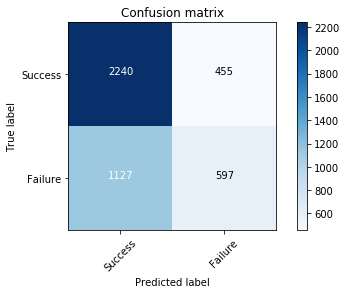

Decision Tree Accuracy is 0.61
{'fit_time': array([0.13749599, 0.12982106, 0.12004709, 0.12336326, 0.12415385]), 'score_time': array([0.01237702, 0.00906205, 0.00898361, 0.00898194, 0.00963402]), 'test_accuracy': array([0.62857143, 0.60650636, 0.62676853, 0.59875495, 0.6196944 ]), 'test_precision_weighted': array([0.64472785, 0.63471956, 0.63521371, 0.61367075, 0.63645458]), 'test_recall_weighted': array([0.62857143, 0.60650636, 0.62676853, 0.59875495, 0.6196944 ]), 'test_f1_weighted': array([0.63323085, 0.61083651, 0.6296773 , 0.6029206 , 0.62424437]), 'test_roc_auc': array([0.66118465, 0.66376785, 0.65598989, 0.63210103, 0.65711139])}
Decision Tree Cross Validation Score = 0.62
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      2695
           1       0.50      0.61      0.55      1724

    accuracy                           0.61      4419
   macro avg       0.61      0.61      0.61      4419
weighted avg       0.63      0.61      

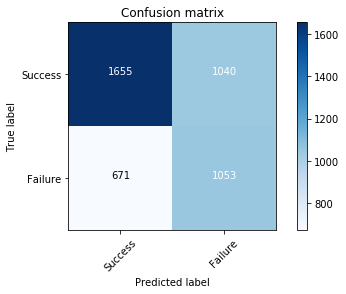

Random Forest Accuracy is 0.65
{'fit_time': array([22.29562497, 21.90283513, 23.21985412, 19.14390683, 19.96978211]), 'score_time': array([1.26666188, 1.35104895, 1.18711901, 1.23655915, 1.19260597]), 'test_accuracy': array([0.67355021, 0.66591231, 0.65619694, 0.63157895, 0.67345784]), 'test_precision_weighted': array([0.6668641 , 0.65892853, 0.64779982, 0.62452014, 0.66550982]), 'test_recall_weighted': array([0.67355021, 0.66591231, 0.65619694, 0.63157895, 0.67345784]), 'test_f1_weighted': array([0.66857973, 0.65989716, 0.6482621 , 0.62651341, 0.66622048]), 'test_roc_auc': array([0.69880607, 0.69886672, 0.69139869, 0.66384002, 0.69847219])}
Random Forest Cross Validation Score = 0.66
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      2695
           1       0.56      0.50      0.53      1724

    accuracy                           0.65      4419
   macro avg       0.63      0.62      0.63      4419
weighted avg       0.65      0.65 

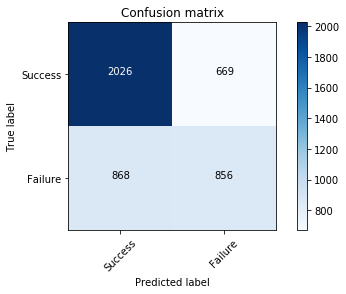

AdaBoost Accuracy is 0.65
{'fit_time': array([9.23231912, 8.6058712 , 8.99135423, 8.93775916, 8.75338888]), 'score_time': array([0.52285218, 0.50140762, 0.5077939 , 0.60204697, 0.54903817]), 'test_accuracy': array([0.65572843, 0.65997171, 0.6426146 , 0.62648557, 0.65563101]), 'test_precision_weighted': array([0.64082153, 0.65308987, 0.63084465, 0.60865093, 0.64353051]), 'test_recall_weighted': array([0.65572843, 0.65997171, 0.6426146 , 0.62648557, 0.65563101]), 'test_f1_weighted': array([0.6271817 , 0.62901218, 0.60797614, 0.59497469, 0.62517826]), 'test_roc_auc': array([0.68522149, 0.69326886, 0.67646574, 0.65030823, 0.68730094])}
AdaBoost Cross Validation Score = 0.65
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      2695
           1       0.61      0.33      0.43      1724

    accuracy                           0.65      4419
   macro avg       0.64      0.60      0.59      4419
weighted avg       0.64      0.65      0.63      

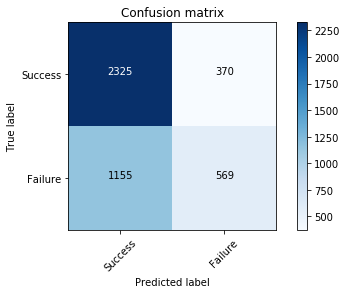

SVM Accuracy is 0.61


/Users/summer2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/summer2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/summer2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/summer2019/opt/anaconda3/lib/python3

{'fit_time': array([29.90818214, 30.56005597, 32.97874093, 32.96633601, 33.91489601]), 'score_time': array([12.00917077, 11.06670594, 11.57341218, 12.71039605, 11.61083698]), 'test_accuracy': array([0.61923621, 0.60650636, 0.60526316, 0.60554612, 0.61346916]), 'test_precision_weighted': array([0.38345348, 0.36784997, 0.36634349, 0.36668611, 0.37634441]), 'test_recall_weighted': array([0.61923621, 0.60650636, 0.60526316, 0.60554612, 0.61346916]), 'test_f1_weighted': array([0.47362266, 0.45795022, 0.45642796, 0.45677431, 0.46650338]), 'test_roc_auc': array([0.66014016, 0.66971677, 0.64885276, 0.63604232, 0.66914977])}
SVM Cross Validation Score = 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      2695
           1       0.00      0.00      0.00      1724

    accuracy                           0.61      4419
   macro avg       0.30      0.50      0.38      4419
weighted avg       0.37      0.61      0.46      4419



/Users/summer2019/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


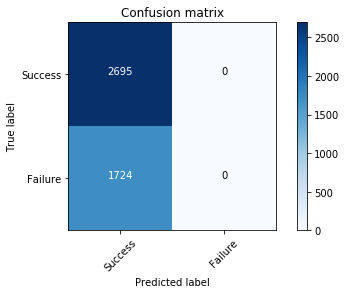

XGBoost Accuracy is 0.66
{'fit_time': array([46.07701683, 47.15733504, 46.87571502, 44.56347489, 45.64527702]), 'score_time': array([0.11316395, 0.10409331, 0.10434103, 0.10781217, 0.10803699]), 'test_accuracy': array([0.66506365, 0.65572843, 0.64827391, 0.64402943, 0.67119411]), 'test_precision_weighted': array([0.65232009, 0.64521648, 0.63643805, 0.63122143, 0.66130637]), 'test_recall_weighted': array([0.66506365, 0.65572843, 0.64827391, 0.64402943, 0.67119411]), 'test_f1_weighted': array([0.64694293, 0.63190035, 0.62399903, 0.62448221, 0.65064045]), 'test_roc_auc': array([0.69978167, 0.70366351, 0.69073529, 0.66096689, 0.70115293])}
XGBoost Cross Validation Score = 0.66
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      2695
           1       0.60      0.39      0.48      1724

    accuracy                           0.66      4419
   macro avg       0.64      0.61      0.61      4419
weighted avg       0.65      0.66      0.64   

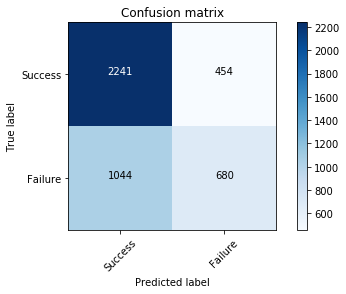

LightGBMError: Do not support special JSON characters in feature name.

In [22]:
def run_exps(X_train, y_train, X_test, y_test, models, class_names):
    models = models
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    scores = []
    names = []
    for name, model in models:
        clf = model.fit(X_train, y_train)
        print ("%s Accuracy is %2.2f" % (name, accuracy_score(y_test, clf.predict(X_test))))
        y_pred = clf.predict(X_test)
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
        cv_results = model_selection.cross_validate(clf, X_train, y_train, cv=kfold, scoring=scoring)
        scores.append(cv_results)
        names.append(name)
        print("%s Cross Validation Score = %2.2f" % (name, cv_results['test_accuracy'].mean()))
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        #Defining the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        #Plotting the confusion matrix
        plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')
        plt.show()
        print("========================================================================")
    return names, scores
models =   [('kNN', KNeighborsClassifier(n_neighbors = 6)), 
            ('Logistic Regression', LogisticRegression(max_iter=10000)), 
            ('Decision Tree', tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)), 
            ('Random Forest', RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")),
            ('AdaBoost', AdaBoostClassifier(n_estimators=400, learning_rate=0.1)), 
            ('SVM', svm.SVC()), 
            ('XGBoost', GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)), 
            ('Light GBM', LGBMClassifier(n_estimators=1100, learning_rate=0.01, max_depth=4, min_child_weight=1, subsample=0.8, colsample_bytree=0.5, num_leaves=100), 
)
    ]
names, scores = run_exps(X_train, y_train, X_test, y_test, models, class_names)


In [ ]:

#lightgbm Classifier
from lightgbm import LGBMClassifier
# parameters={'n_estimators':[900,1000,1100],
#             'learning_rate':[0.01],
#             'max_depth':[8],
#             'min_child_weight':[1],
#             'subsample':[0.8],
#             'colsample_bytree':[0.3,0.4,0.5]}
lgb = LGBMClassifier(n_estimators=1100, learning_rate=0.01, max_depth=4, min_child_weight=1, subsample=0.8, \
                     colsample_bytree=0.5, num_leaves=100)

lgb.fit(X_train,y_train)
print ("LightGBM Accuracy= %2.2f" % accuracy_score(y_test,lgb.predict(X_test)))
score_lgb = cross_val_score(lgb, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_lgb)
y_pred = lgb.predict(X_test)
print(classification_report(y_test, y_pred))
#Confusion Marix for lightgbm
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

<a id='roc'></a>
## ROC Curves
> Applying Reciever Operating Characteristic(ROC) Curves to plot the true positive rate and the false postive rates so that we can determine which model works best.

In [ ]:
#Obtaining False Positive Rate, True Positive Rate and Threshold for all classifiers
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
#SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
lgb_fpr, lgb_tpr, thresholds = roc_curve(y_test, lgb.predict_proba(X_test)[:,1])
#PLotting ROC Curves for all classifiers
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
#plt.plot(SVM_fpr, SVM_tpr, label='SVM')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(ada_fpr, ada_tpr, label='AdaBoost')
plt.plot(xgb_fpr, xgb_tpr, label='GradientBoosting')
plt.plot(lgb_fpr, lgb_tpr, label='LightGBM')
# Plot Base Rate ROC

plt.plot([0,1],[0,1],label='Base Rate')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Best Model

In [177]:
rf = RandomForestClassifier(n_estimators=400, max_depth=7, min_samples_split=4, 
                           criterion='gini', max_features='auto', class_weight='balanced')
selected_columns = ['most_recent_call_event_diff', 'most_recent_call_event_diff', 'average_time_between_event','diff_most_least_recent_call',
                   'most_recent_call_hour', 'least_recent_call_hour', 'least_recent_event_week', 'total_calls_count',
                   'most_recent_event_day', 'average_time_between_calls', 'most_recent_call_week', 'least_recent_call_week',
                   'total_activity_count', 'diff_most_least_recent_event', 'form_fill', 'known_web_visit', 'email_open']
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]
rf.fit(X_train_selected, y_train)
y_pred_train = rf.predict(X_train_selected)
y_pred_test = rf.predict(X_test_selected)
print("Random Forest Training Accuracy= %2.2f" % accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Random Forest Testing Accuracy= %2.2f" % accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Random Forest Training Accuracy= 0.71
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      2464
           1       0.61      0.75      0.67      1580

    accuracy                           0.71      4044
   macro avg       0.71      0.72      0.71      4044
weighted avg       0.73      0.71      0.72      4044

Random Forest Testing Accuracy= 0.61
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       617
           1       0.50      0.61      0.55       395

    accuracy                           0.61      1012
   macro avg       0.61      0.61      0.60      1012
weighted avg       0.63      0.61      0.62      1012



## Feature Importance

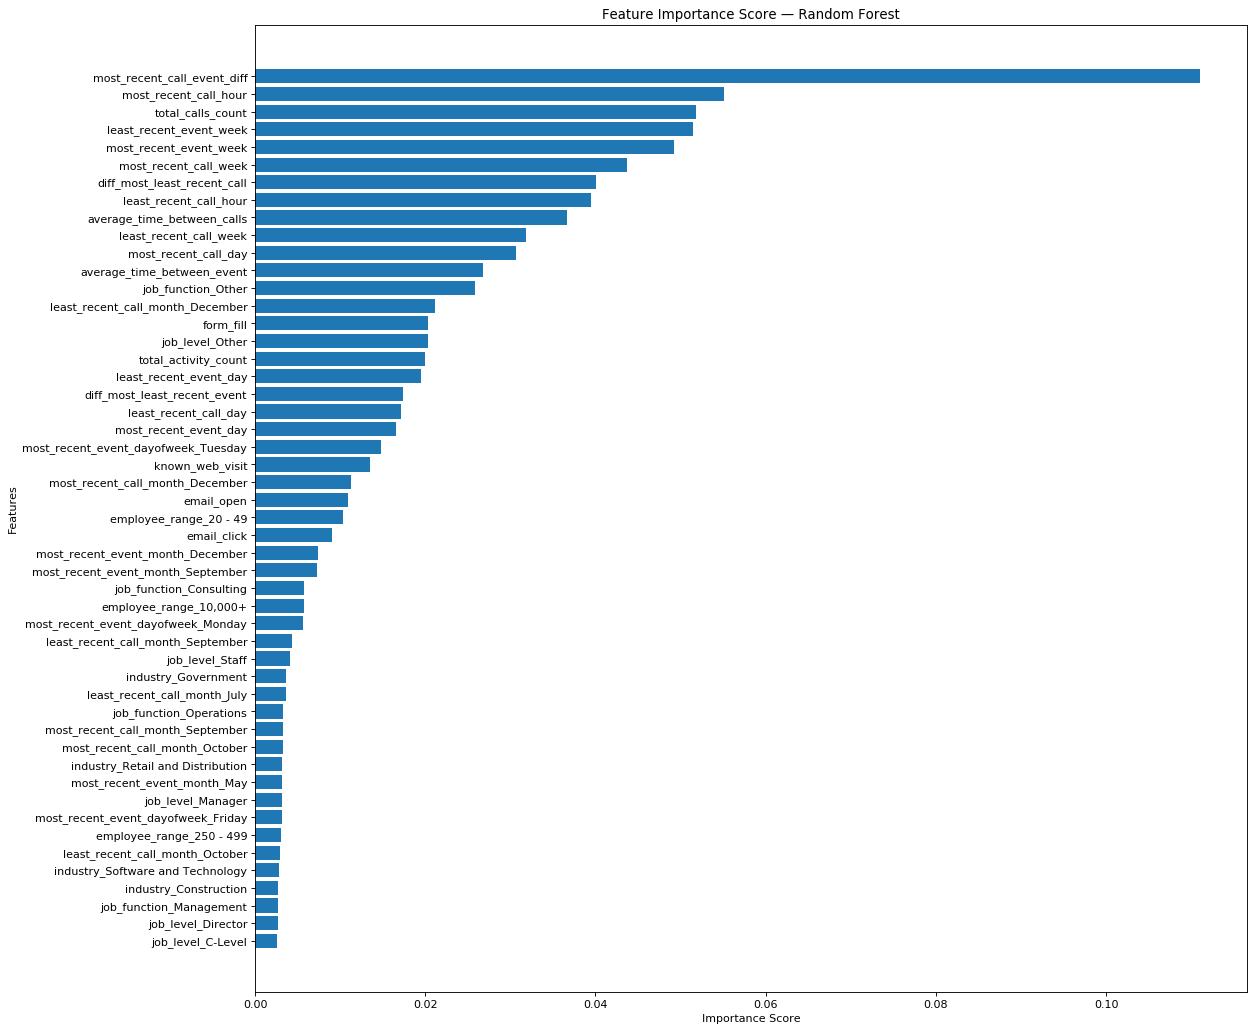

In [137]:
selected_columns = X_train.columns
feature_importances = pd.DataFrame(rf.feature_importances_,index = selected_columns,columns=["importance"]).sort_values("importance",ascending=False)
num = min([50,len(selected_columns)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(16, 16), dpi=80, facecolor="w", edgecolor="k");
plt.barh(ylocs, values_to_plot, align = "center")
plt.ylabel("Features")
plt.xlabel("Importance Score")
plt.title("Feature Importance Score — Random Forest")
plt.yticks(ylocs, feature_labels)
plt.show()

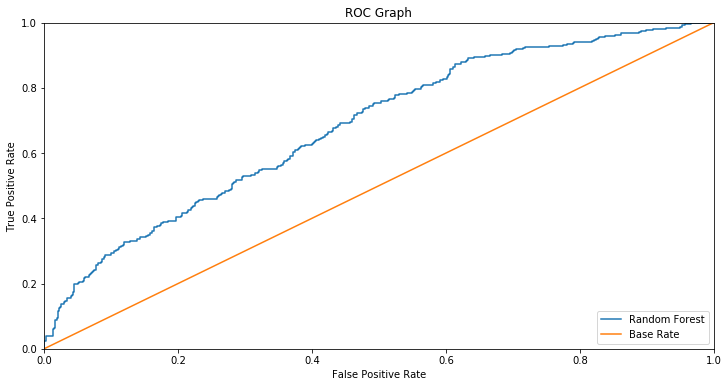

In [139]:
#Obtaining False Positive Rate, True Positive Rate and Threshold 
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
#SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
#PLotting ROC Curves for all classifiers
plt.figure(figsize=(12,6))
#plt.plot(SVM_fpr, SVM_tpr, label='SVM')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
# Plot Base Rate ROC

plt.plot([0,1],[0,1],label='Base Rate')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Stratified KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

dfs = []
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
i = 1
features = ['most_recent_call_event_diff', 'most_recent_call_event_diff', 'average_time_between_event','diff_most_least_recent_call',
               'most_recent_call_hour', 'least_recent_call_hour', 'least_recent_event_week', 'total_calls_count',
               'most_recent_event_day', 'average_time_between_calls', 'most_recent_call_week', 'least_recent_call_week',
               'total_activity_count', 'diff_most_least_recent_event', 'form_fill', 'known_web_visit', 'email_open']
for train_index, test_index in kf.split(X, y):
    X_train = model_data.iloc[train_index].loc[:, features]
    X_test = model_data.iloc[test_index].loc[:,features]
    y_train = model_data.iloc[train_index].loc[:,'successful_call']
    y_test = model_data.loc[test_index].loc[:,'successful_call']

    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# model = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")

model.fit(X_train,y_train)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = param_grid, 
                               cv = 5, verbose= 5, n_jobs = -1)
model.fit(X_train, y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test, predictionforest)

# Model Evaluation:
###  Model Performance Comparison

In [23]:
names

NameError: name 'names' is not defined

In [28]:
model.best_params_

AttributeError: 'RandomForestClassifier' object has no attribute 'best_params_'